In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
import numpy as np
import pandas as pd
import os
import time
import tqdm

from astropy import units as u
from astropy.stats import sigma_clip
import scipy.stats

import blimpy as bl

# sys.path.insert(0, "/home/bryanb/setigen")
import setigen as stg

# sys.path.insert(0, '/home/bryanb/bl-scint-analysis')
import blscint as bls

In [2]:
%matplotlib inline

In [3]:
DIR = '/datax/scratch/cgchoza/sigrec'

In [5]:
fn = f'{DIR}/10504394531_x_0drift_center_200_inserted.h5'
!ls $fn

/datax/scratch/cgchoza/sigrec/10504394531_x_0drift_center_200_inserted.h5


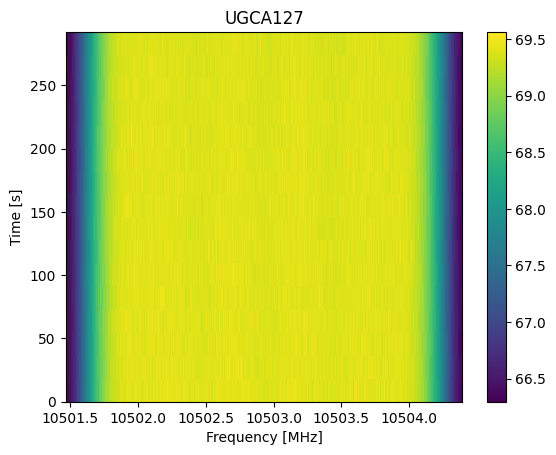

In [7]:
frame = stg.Frame(fn)
frame.bl_plot()

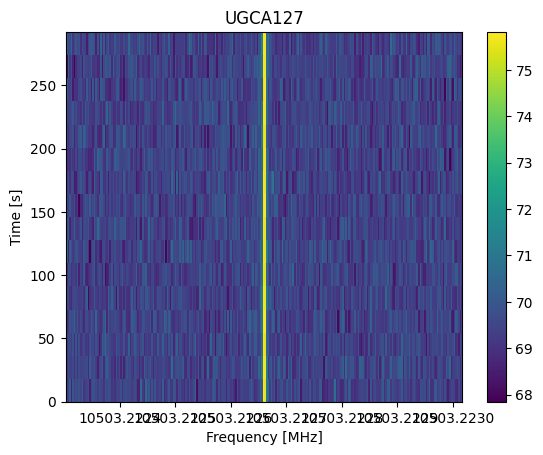

In [11]:
f_start = 10503.222657
frame = stg.Frame(waterfall=bl.Waterfall(fn, f_start=f_start-128*frame.df/1e6, f_stop=f_start+128*frame.df/1e6))
frame.bl_plot()
plt.show()

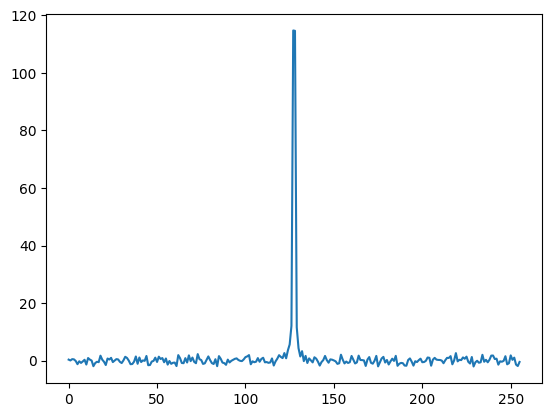

In [14]:
spectrum = frame.integrate(normalize=True)
plt.plot(spectrum)
plt.show()

In [15]:
fn = f'{DIR}/10504394531_x_0drift_edge_200_inserted.h5'
!ls $fn

/datax/scratch/cgchoza/sigrec/10504394531_x_0drift_edge_200_inserted.h5


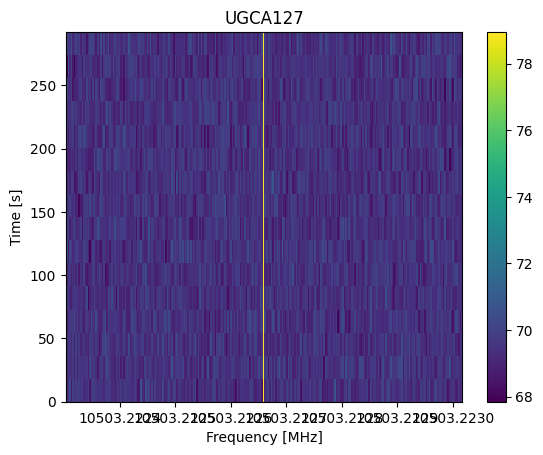

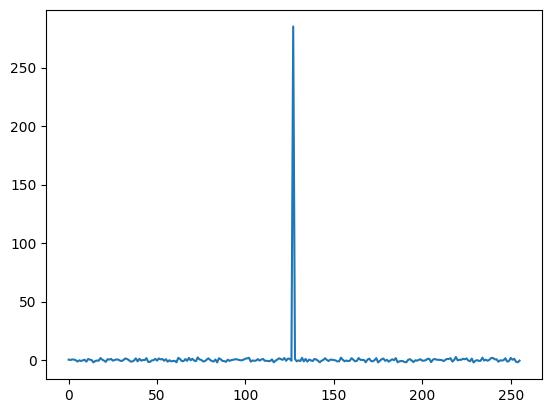

In [16]:
f_start = 10503.222657
frame = stg.Frame(waterfall=bl.Waterfall(fn, f_start=f_start-128*frame.df/1e6, f_stop=f_start+128*frame.df/1e6))
frame.bl_plot()
plt.show()

spectrum = frame.integrate(normalize=True)
plt.plot(spectrum)
plt.show()

In [17]:
frame = stg.Frame(fn)
frame.get_noise_stats()

(8249628.0, 1410449.4)

In [18]:
frame = stg.Frame(waterfall=bl.Waterfall(fn, f_start=f_start-128*frame.df/1e6, f_stop=f_start+128*frame.df/1e6))
frame.get_noise_stats()

(8802800.0, 908763.75)

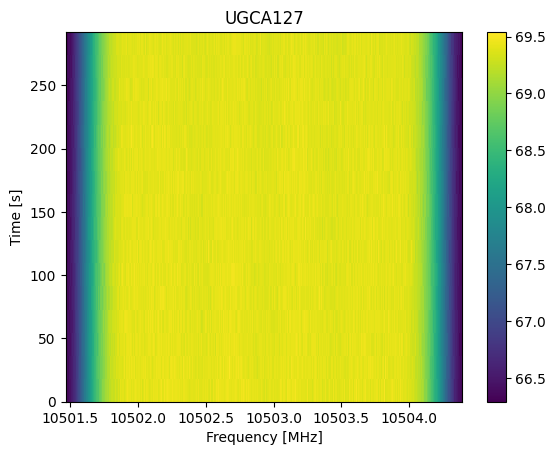

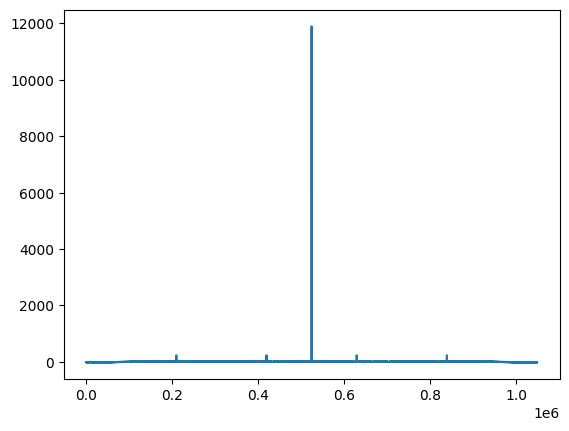

In [19]:
frame = stg.Frame(fn)
frame.bl_plot()
plt.show()

spectrum = frame.integrate(normalize=True)
plt.plot(spectrum)
plt.show()

In [23]:
np.sort(spectrum)[::-1][:10]

array([1.1899200e+04, 2.3327940e+02, 2.3286032e+02, 2.3281079e+02,
       2.3269614e+02, 3.9186757e+00, 3.6940694e+00, 3.6927559e+00,
       3.6558411e+00, 3.6487336e+00], dtype=float32)

In [27]:
spectrum_int = frame.integrate()
print(spectrum_int.shape)
spectrum_int = np.sort(spectrum_int)
cut_num = int(0.05*len(spectrum_int))
spectrum_int = spectrum_int[cut_num:-cut_num]

print(cut_num, spectrum_int.shape)

(1048576,)
52428 (943720,)


8333575.0 941768.5


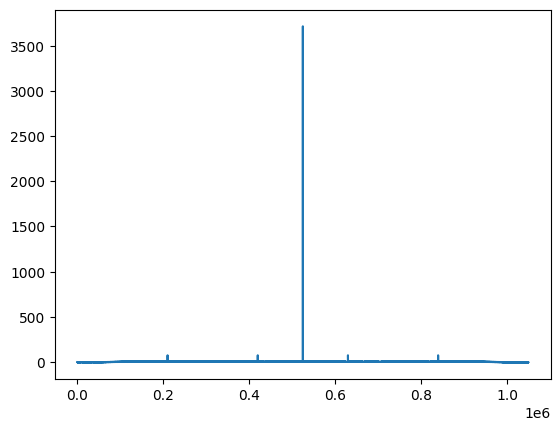

[3.7140398e+03 7.3195732e+01 7.3064934e+01 7.3049477e+01 7.3013695e+01
 1.6140156e+00 1.5439177e+00 1.5435078e+00 1.5319870e+00 1.5297687e+00]


In [30]:
print(np.mean(spectrum_int), np.std(spectrum_int))
spectrum_plot = (frame.integrate() - np.mean(spectrum_int)) / np.std(spectrum_int)
plt.plot(spectrum_plot)
plt.show()
print(np.sort(spectrum_plot)[::-1][:10])